In [7]:
!pip install shap
!pip install openpyxl

In [2]:
from sklearn import preprocessing
import random
import numpy as np
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


In [8]:
df = pd.read_excel('https://raw.githubusercontent.com/TheeratornP/files/main/%E0%B8%AA%E0%B8%B3%E0%B8%A3%E0%B8%A7%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89%20Smartphone%20(Responses).xlsx', engine='openpyxl')
#df
X = df.drop(['จากข้อที่แล้ว เนื่องจากสาเหตุใด', 'Timestamp', 'ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'], axis=1)
#X
Y = df['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด']
#Y
df.head()

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด
0,2024-01-13 14:41:24.845,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์
1,2024-01-13 15:01:07.628,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร
2,2024-01-13 15:01:43.854,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม
3,2024-01-13 15:01:48.140,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน
4,2024-01-13 15:01:48.801,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน


In [9]:
pvx = pd.get_dummies(X)
pvx.drop(['หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_ยังไม่รู้'], inplace= True, axis = 1)
pvx

,เพศของผู้ตอบแบบสอบถาม_ชาย,เพศของผู้ตอบแบบสอบถาม_หญิง,ช่วงอายุของผู้ตอบแบบสอบถาม_21-25 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_26-30 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_31-35 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_36-40 ปี,อาชีพของผู้ตอบแบบสอบถาม_Freelancer,อาชีพของผู้ตอบแบบสอบถาม_ข้าราชการ,อาชีพของผู้ตอบแบบสอบถาม_นักศึกษา,อาชีพของผู้ตอบแบบสอบถาม_รัฐวิสาหกิจ,...,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_น้อยที่สุด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยครั้ง,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยที่สุด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_ปานกลาง,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Google,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Iphone,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Nokia,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oneplus,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oppo,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Samsung
0,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
65,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
66,False,True,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
67,True,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [10]:
ley = preprocessing.LabelEncoder()
ley.fit(Y.unique())
ley = pd.DataFrame(ley.transform(Y) ,columns= [Y.name])
ley

,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด
0,1
1,1
2,1
3,1
4,1
...,...
64,0
65,1
66,0
67,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(pvx, ley, test_size=0.3, random_state=1)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
LR = LogisticRegression()
LR.fit(X_train, y_train)
accuracy = LR.score(X_test, y_test)
accuracy

0.9047619047619048

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')

In [13]:
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.89      0.94        19

    accuracy                           0.90        21
   macro avg       0.75      0.95      0.81        21
weighted avg       0.95      0.90      0.92        21



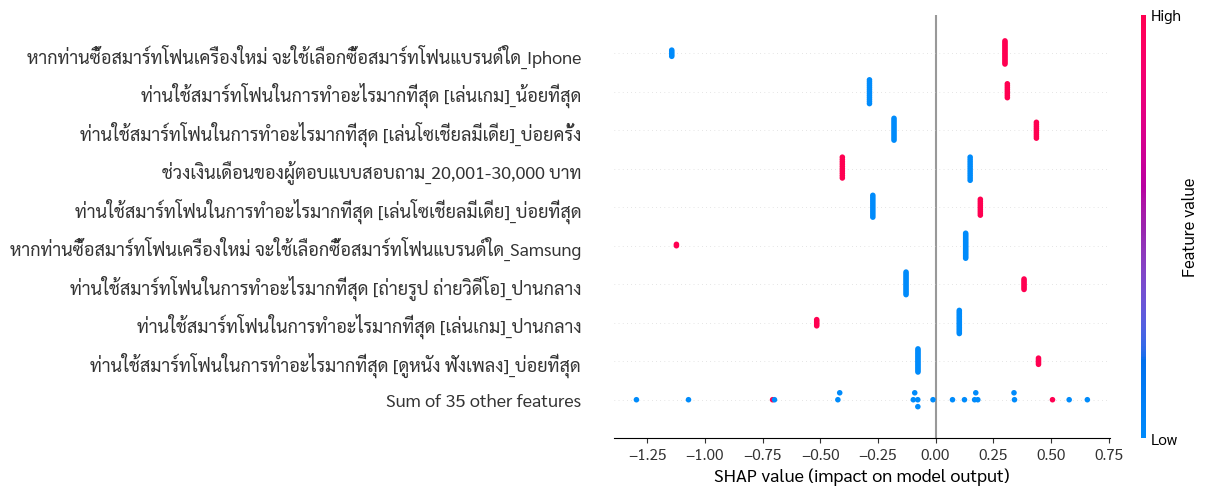

<module 'shap.plots' from '/usr/local/lib/python3.10/dist-packages/shap/plots/__init__.py'>

In [14]:
# Rank feature importance by using beeswarm
print(classification_report(y_test, LR.predict(X_test)))
col_names = ley.join(pvx).columns
np.random.seed(101)
shap.initjs()

explainer = shap.Explainer(LR, X_train, feature_names=col_names)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)
shap.plots


In [15]:
# Analyse one sample (random) from test set

shap.initjs()
max_index = len(shap_values) - 1
ind = random.randint(0, max_index)
shap.plots.force(shap_values[ind])